#Here we are trying to optimize a user's portfolio using EFFICIENT FRONTIER

# **IMPORTING LIBRARIES**

In [0]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# CREATING THE PORTFOLIO

In [0]:
sd_portfolio=['AAPL','NFLX','FB','SPOT','TSLA']
#assigning weights to the stocks 
#how much we are inveting in them in terms of percentage
weights=np.array([0.20,0.20,0.20,0.20,0.20])
#starting and ending date of the portfolio
today = datetime.today().strftime('%y-%m-%d')

In [3]:
df=pd.DataFrame()
#store the stock data
startdate='2019-01-01'
for stock in sd_portfolio:
  df[stock]= web.DataReader(stock, data_source='yahoo', start=startdate, end=today)['Adj Close']
df

,AAPL,NFLX,FB,SPOT,TSLA
Date,,,,,
2019-01-02,154.794983,267.660004,135.679993,113.739998,310.119995
2019-01-03,139.376251,271.200012,131.740005,109.019997,300.359985
2019-01-04,145.326126,297.570007,137.949997,118.510002,317.690002
2019-01-07,145.002686,315.339996,138.050003,119.360001,334.959991
2019-01-08,147.766861,320.269989,142.529999,117.480003,335.350006
...,...,...,...,...,...
2020-05-18,314.959991,452.579987,213.190002,161.429993,813.630005
2020-05-19,313.140015,451.040009,216.880005,175.029999,808.010010
2020-05-20,319.230011,447.670013,229.970001,189.800003,815.559998


<function matplotlib.pyplot.show>

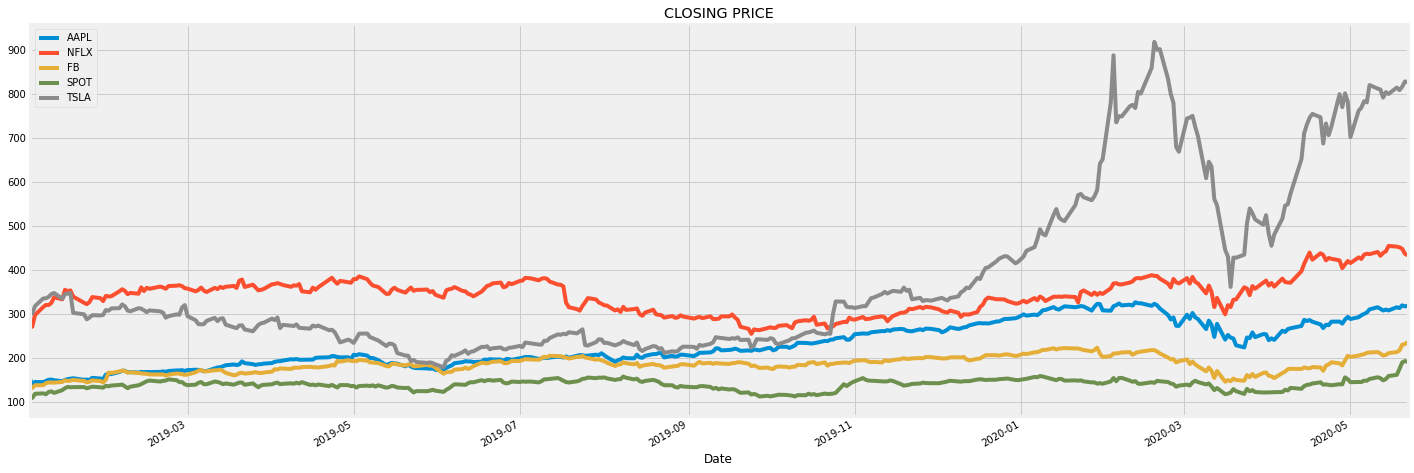

In [4]:
df.plot(title="CLOSING PRICE",figsize=(22,8))
plt.show

<function matplotlib.pyplot.show>

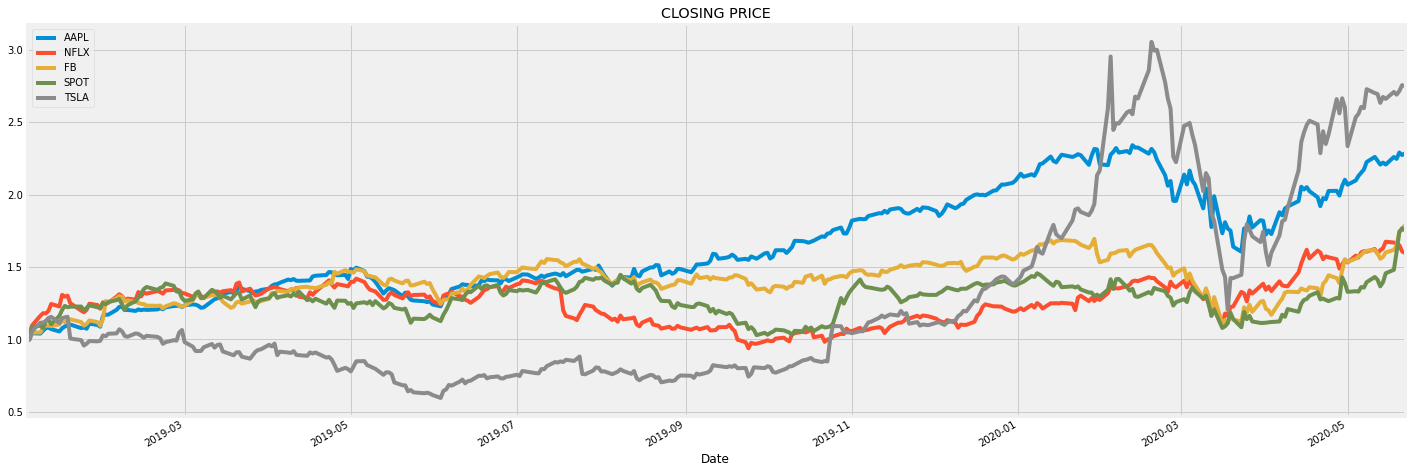

In [5]:
(df/df.iloc[1]).plot(title="CLOSING PRICE",figsize=(22,8))
plt.show

# Daily **Returns**

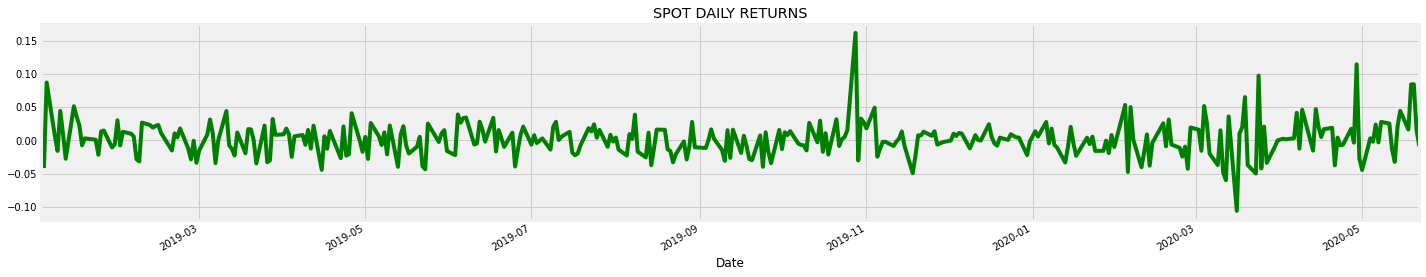

In [6]:
returns=df.pct_change()
returns['SPOT'].plot(color='g',title="SPOT DAILY RETURNS",figsize=(22,4))
plt.show()

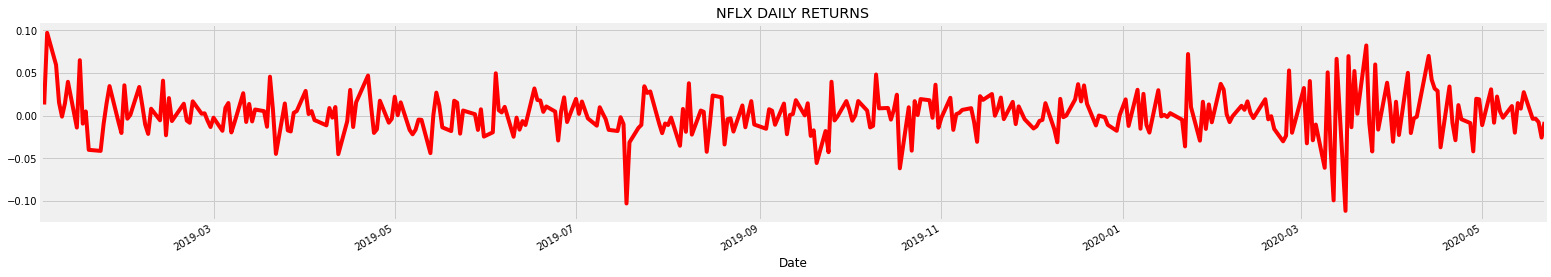

In [7]:
returns['NFLX'].plot(color='r',title="NFLX DAILY RETURNS" ,figsize=(24,4))
plt.show()

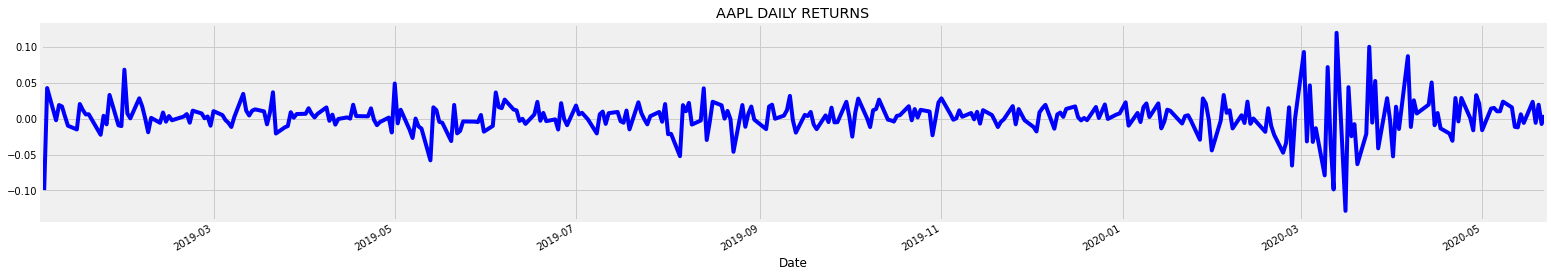

In [8]:
returns['AAPL'].plot(color='b',title="AAPL DAILY RETURNS" ,figsize=(24,4))
plt.show()

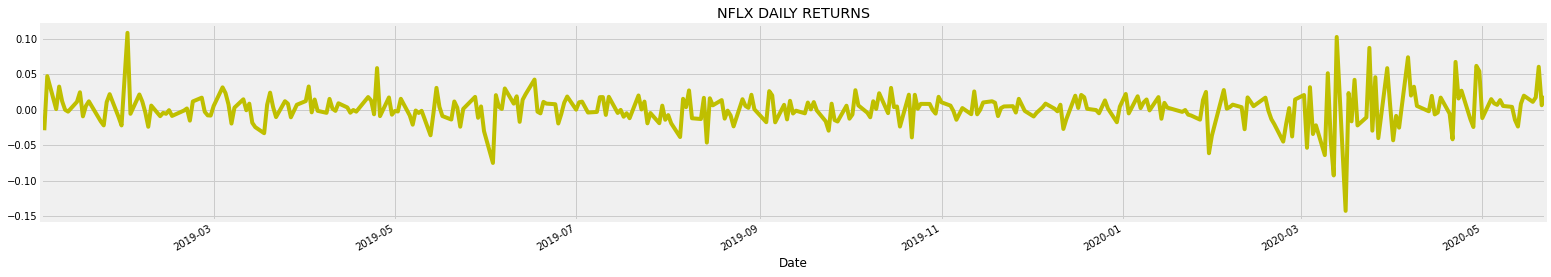

In [9]:
returns['FB'].plot(color='y',title="NFLX DAILY RETURNS" ,figsize=(24,4))
plt.show()

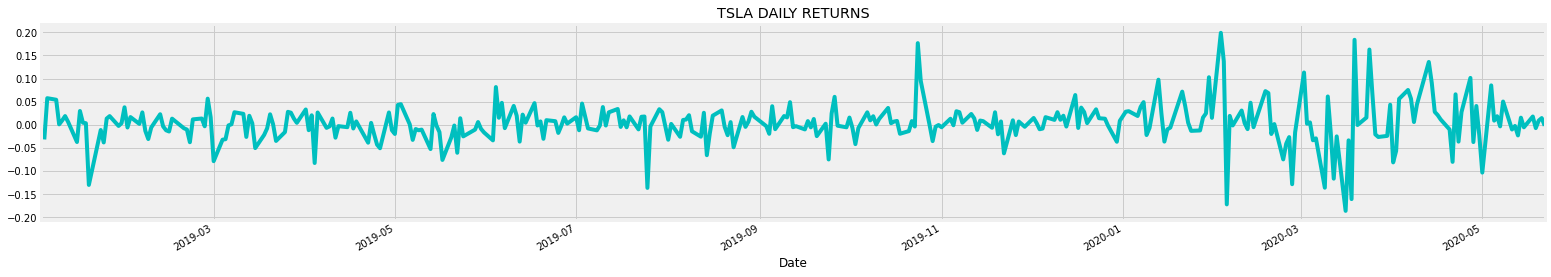

In [10]:
returns['TSLA'].plot(color='c',title="TSLA DAILY RETURNS" ,figsize=(24,4))
plt.show()

# Covarience Matrix

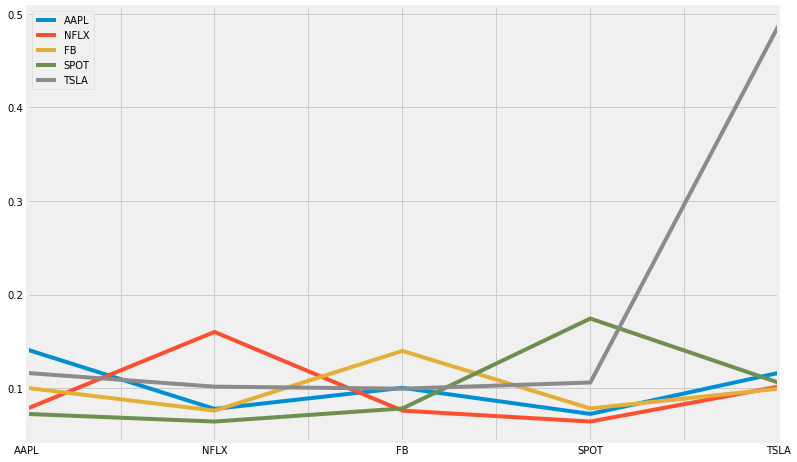

In [11]:
#diagonals are varience and rest are covarience
#varience shows how much the values differ from each other and covarience shows how much they are related to the other columns
covar=returns.cov()*250
covar.plot(figsize=(12,8))

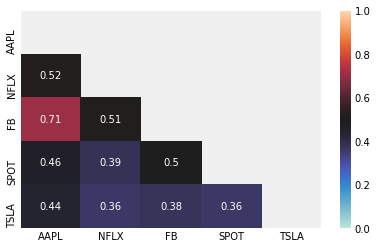

In [12]:
matrix = np.triu(returns.corr())
sns.heatmap(returns.corr(),annot=True,vmin=0, vmax=1, center= 0.5,mask=matrix)

# **Portfolio Varience, Risk, Annual Returns**

Portfolio varience

In [13]:
p_var=np.dot(weights.T,np.dot(covar,weights))
#portfolio varience
p_var

0.11554890649707635

Portfolio Volatility or **Risk**

In [14]:
#portfolio volatility aka standard deviation 
p_volatility=np.sqrt(p_var)
p_volatility

0.33992485419144675

Portfolio Annual Returns

In [15]:
p_smpl_annl_rtrn=np.sum(returns.mean()*weights)*250
p_smpl_annl_rtrn

0.5752179327340434

**Analysis**

In [16]:
pvar=round(p_var,2)*100
pvol=round(p_volatility,2)*100
panre=round(p_smpl_annl_rtrn,2)*100
print(pvar, pvol, panre)

12.0 34.0 57.99999999999999


# **OPTIMIZATION**

In [17]:
pip install PyPortfolioOpt

In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [20]:
#calculate expected returns and the annualized sample covarience matrix of assets returns
mu= expected_returns.mean_historical_return(df)
S= risk_models.sample_cov(df)

#optimize for Maximize sharpe ratio
#sharpe ratio tells us that how much excess returns do we get for a particular risk
#this can be used to compare the stocks to bonds 

ef=EfficientFrontier(mu,S)
#we are maximizing the sharp ratio
weights=ef.max_sharpe()
#as per default cutoff it can change the weights
clean_weights=ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose=True)

{'AAPL': 0.56255, 'NFLX': 0.06568, 'FB': 0.00453, 'SPOT': 0.13839, 'TSLA': 0.22885}
Expected annual return: 64.4%
Annual volatility: 36.6%
Sharpe Ratio: 1.70


(0.6442216183980309, 0.36626144375500774, 1.7043061153211987)

# Distribution of Investment

In [22]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights = clean_weights
da= DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation , leftover = da.lp_portfolio()

print("We can buy these many shares as of today",allocation)
print("This much will be leftover",leftover)

We can buy these many shares as of today {'AAPL': 36.0, 'NFLX': 3.0, 'FB': 1.0, 'SPOT': 15.0, 'TSLA': 5.0}
This much will be leftover 6.1780853271484375
